<a href="https://colab.research.google.com/github/raysky9999/preScreen/blob/main/PreScreen1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
path = 'drive/MyDrive/Colab Notebooks/' #change path accordingly to where you store the input file

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv(path + 'ingredient.csv')


In [3]:
df.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       214 non-null    float64
 1   b       214 non-null    float64
 2   c       214 non-null    float64
 3   d       214 non-null    float64
 4   e       214 non-null    float64
 5   f       214 non-null    float64
 6   g       214 non-null    float64
 7   h       214 non-null    float64
 8   i       214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


In [5]:
df

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00
...,...,...,...,...,...,...,...,...,...
209,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16
210,1.51848,13.64,3.87,1.27,71.96,0.54,8.32,0.00,0.32
211,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.00,0.00
212,1.51841,12.93,3.74,1.11,72.28,0.64,8.96,0.00,0.22


<Axes: >

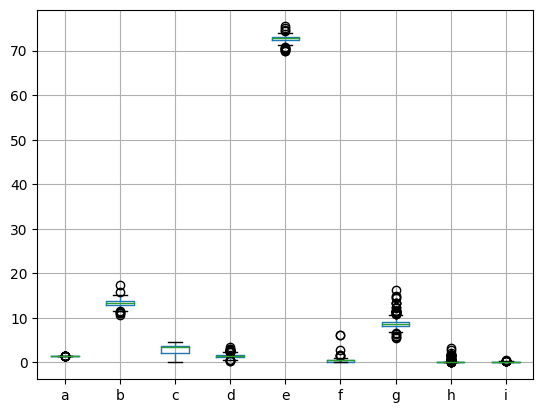

In [6]:
df.boxplot()

<Axes: >

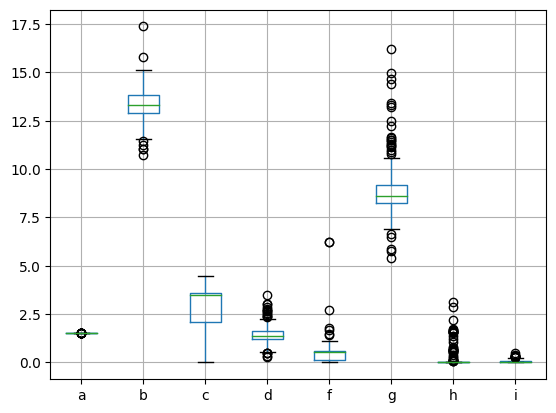

In [7]:
dfFilter = df.drop(columns=['e'])# additive column e has a very distincitively high value compared to the rest best to be visualized separately
dfFilter.boxplot()


<Axes: ylabel='e'>

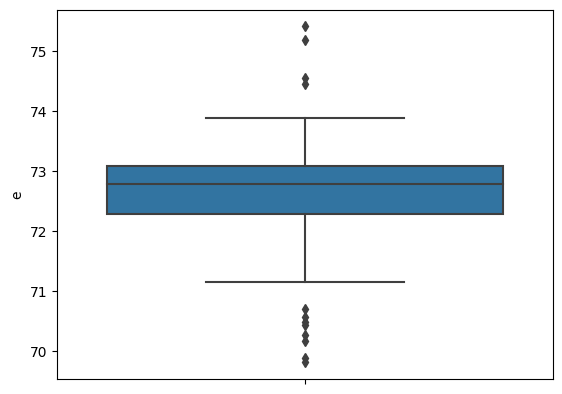

In [8]:
sns.boxplot(y=df['e'])

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>,
        <Axes: title={'center': 'c'}>],
       [<Axes: title={'center': 'd'}>, <Axes: title={'center': 'e'}>,
        <Axes: title={'center': 'f'}>],
       [<Axes: title={'center': 'g'}>, <Axes: title={'center': 'h'}>,
        <Axes: title={'center': 'i'}>]], dtype=object)

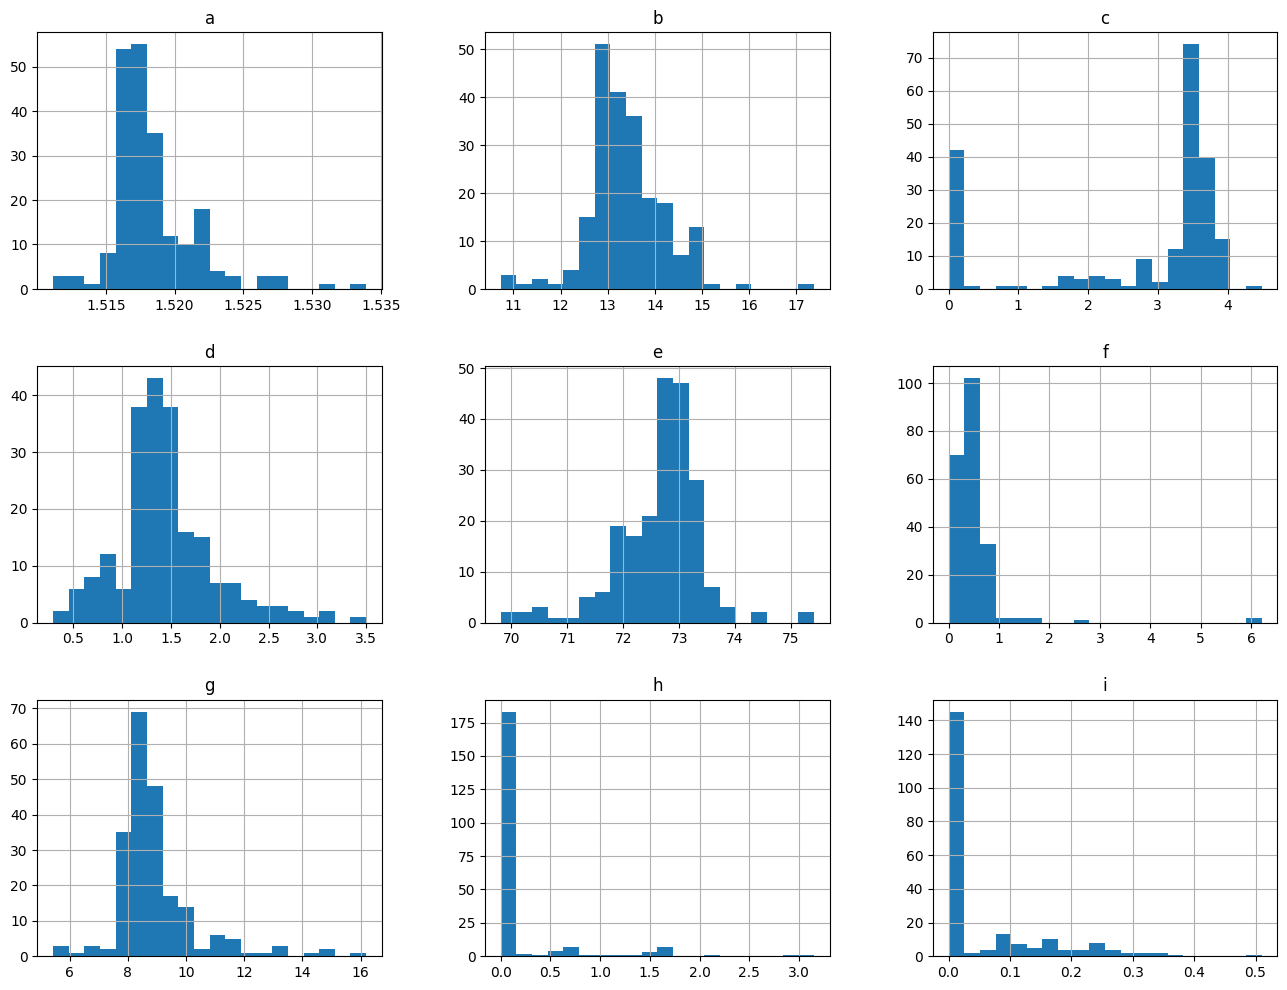

In [9]:
df.hist(bins=20,figsize=(16,12))

h and i seems irrelevant due to many of the data has 0 values

c may need to be cleansed with potential missing data, but has enough to be used for further analysis



<Axes: >

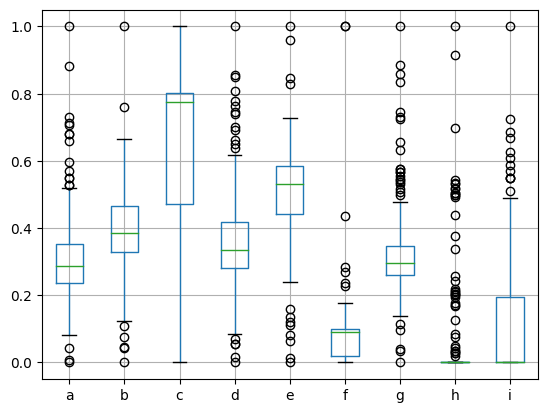

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data,
                         columns=df.columns)

X=scaled_df
#scales the data to equivalent range and replot the hist & boxplot
scaled_df.boxplot()

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>,
        <Axes: title={'center': 'c'}>],
       [<Axes: title={'center': 'd'}>, <Axes: title={'center': 'e'}>,
        <Axes: title={'center': 'f'}>],
       [<Axes: title={'center': 'g'}>, <Axes: title={'center': 'h'}>,
        <Axes: title={'center': 'i'}>]], dtype=object)

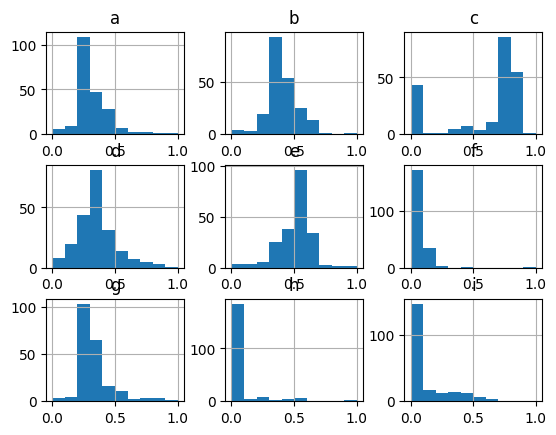

In [11]:
scaled_df.hist()

Correlation between features



<Axes: >

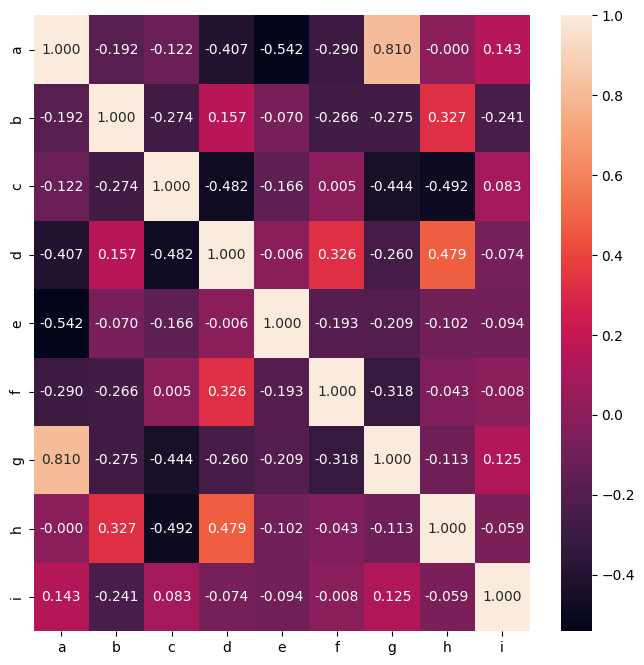

In [12]:
print("Correlation between features\n")
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,fmt='.3f')

a & g, d & h, d & f as well as b & h seems to show high positive correlation to each other

meanwhile a & d, a & e, c & d, c & h as well as c & g seems to have negative correlation pattern to one another

In [13]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.25, min_samples=3).fit(X)
clustering.labels_

array([ 0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,
       -1,  1,  0,  0,  0,  2,  0, -1,  0,  0,  0, -1,  0,  3,  0,  4,  0,
        0,  0,  0,  0,  0,  0,  0,  3, -1,  0,  3,  0, -1,  0,  2,  2,  0,
        0,  0,  0,  0,  0,  0,  4,  0, -1,  0,  0,  0,  0,  0,  0,  3,  0,
        0,  2,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  2,  0, -1,
        0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  4,  0,  0,  0,
       -1,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  2,  0,  2,
        1,  0,  0, -1,  0,  2,  0,  0, -1,  0, -1, -1,  0,  0, -1,  0,  0,
        0,  0,  0,  3,  0,  0,  2,  0,  0,  0,  0,  4,  4,  0,  0,  0, -1,
        0,  4,  0,  0,  0,  0, -1,  0, -1, -1,  0, -1,  1,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  2,  0,  4,  0,  3,  0,  0,  0, -1, -1,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0, -1])

In [14]:
df['labels']=clustering.labels_

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>,
        <Axes: title={'center': 'c'}>],
       [<Axes: title={'center': 'd'}>, <Axes: title={'center': 'e'}>,
        <Axes: title={'center': 'f'}>],
       [<Axes: title={'center': 'g'}>, <Axes: title={'center': 'h'}>,
        <Axes: title={'center': 'i'}>],
       [<Axes: title={'center': 'labels'}>, <Axes: >, <Axes: >]],
      dtype=object)

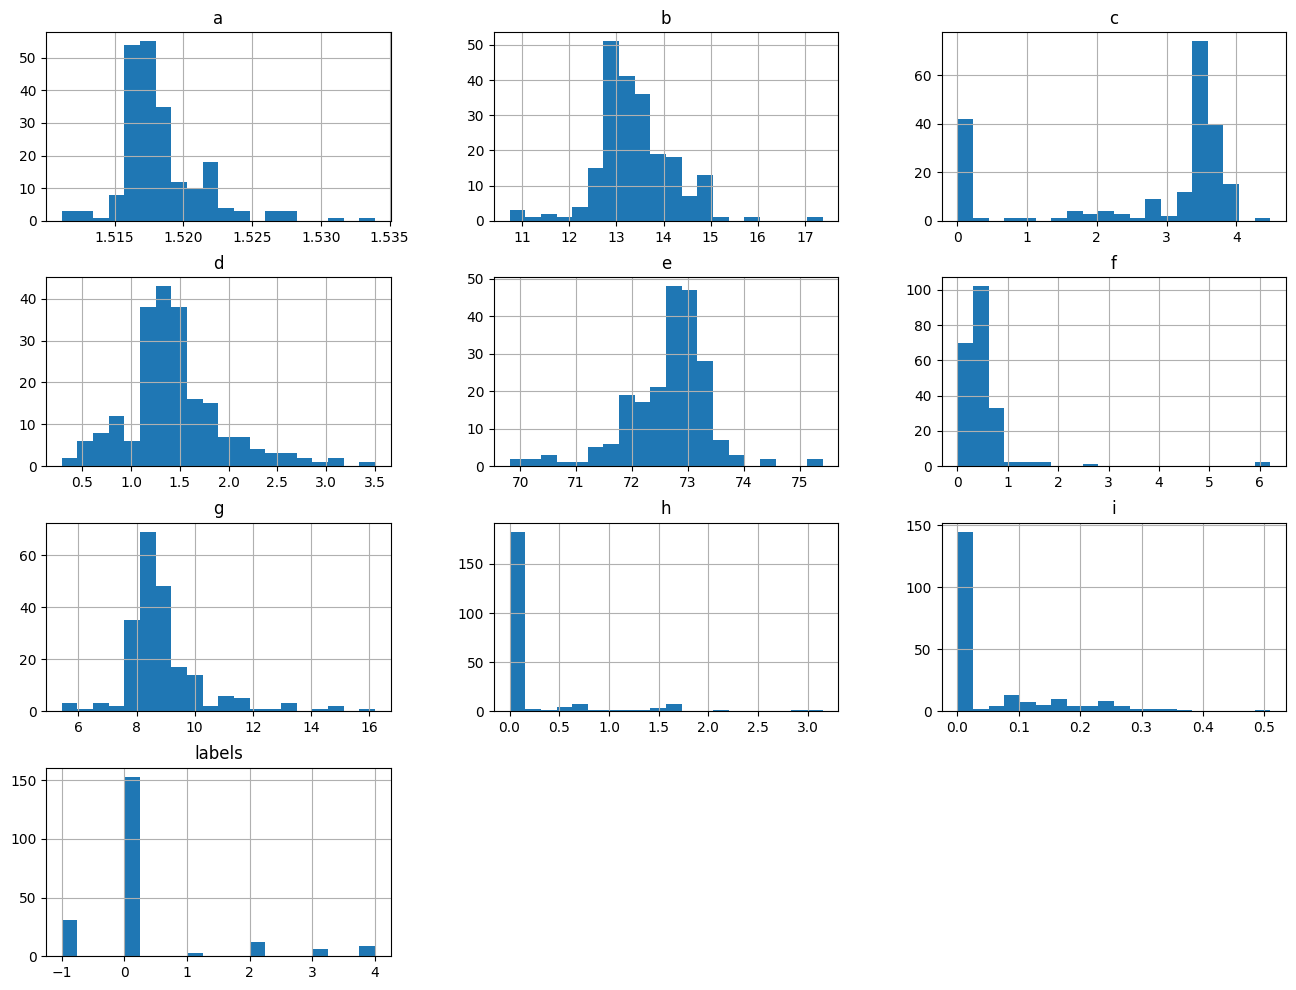

In [15]:
df.hist(bins=20,figsize=(16,12))

DBSCAN found 6 clusters with eps 0.25 and minSample 3, using TSNE we can visualize the result of the DBSCAN labels of clustering

In [16]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(X)
df["x_component"]=X_embedded[:,0]
df["y_component"]=X_embedded[:,1]

In [17]:
import plotly.express as px

fig = px.scatter(df, x="x_component", y="y_component", color = "labels", size_max=60)
fig.update_layout(
     height=800)
fig.show()

FUTURE WORKS:
Potentially attempt some outliers removal and re-study the correlation again, run clustering again to check if result is similar